In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
plt.style.use('ggplot')
#% matplotlib inline
%matplotlib nbagg
np.random.seed(1)

In [4]:
Data = pd.read_csv('example_data.txt',delimiter=' ',names=['x','y','err'])

In [5]:
x_values = Data.x
y_values = Data.y
error = Data.err

<IPython.core.display.Javascript object>


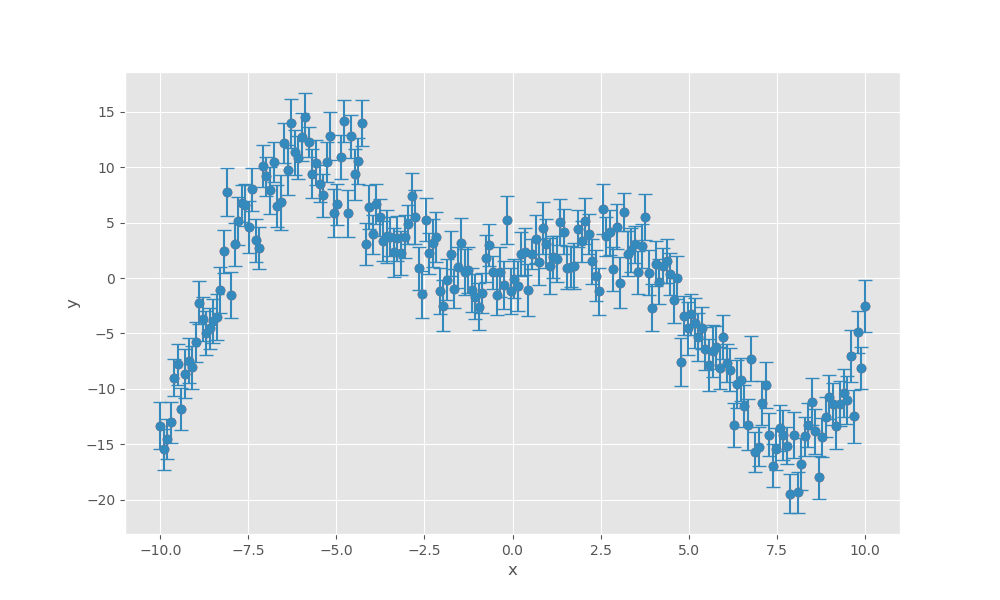

Text(0,0.5,'y')

In [6]:
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values,'o',label='Data')
plt.errorbar(x_values,y_values,yerr=error,fmt='o',capsize=5)
plt.xlabel('x')
plt.ylabel('y')


<IPython.core.display.Javascript object>


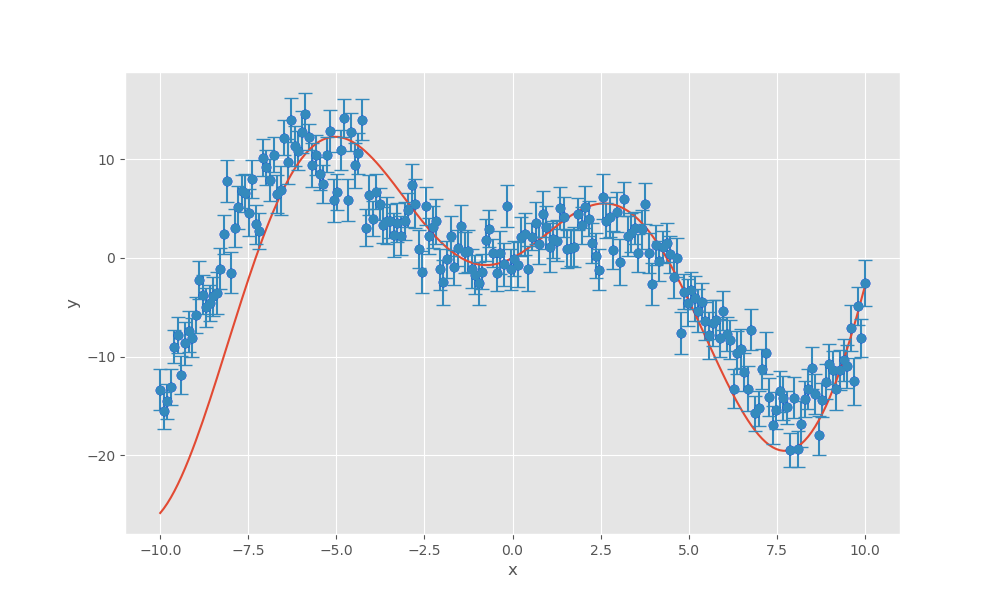

Text(0,0.5,'y')

In [5]:
# 'guessed'  values of a,b,c to have an idea of the paramaters
x_val = np.linspace(-10,10,200)
y_guess = 2.6*x_val*np.sin(3*np.pi/17.5*x_val+np.pi/4)

plt.figure(figsize=(10,6))
Model, = plt.plot(x_val,y_guess,label='Model')
plt.plot(x_values,y_values,'o',color='blue',label='Data')
plt.errorbar(x_values,y_values,yerr=error,fmt='o',capsize=5)
plt.xlabel('x')
plt.ylabel('y')


In [7]:
def Model(a,b,c,x):
    y_i = a*x*np.sin(b*x+c)
    return y_i

def Likelihood(x,y,a,b,c,sigma):
    mu = Model(a,b,c,x)
    term1 = np.log(2*np.pi*(sigma**2))
    term2 = ((y-mu)**2)/(2*sigma**2)
    
    return sum((term1-term2))

In [8]:
def metropolis_hasting(N,theta,nparams,Flat_prior=True):
    
    '''
    Returns the sampled posterior values of theta=[theta1,theta2,etc] parameters
    
    Parameters
    -------------
    N : int 
        sample size

    theta : list or array_like
        initial paramater values (theta1,theta2,etc)
        
    nparams: int
        number of parameters 
    
    Flat_prior : Bool
        True for a flat prior and False for non-flat prior.
    
    Returns
    --------
    out: array_like , int
        Posterior distribution for each theta1,theta2,etc
        and number of accepted samples
        
    '''
    
    
    N = N
    nsample = 0
    samples = np.zeros((N,nparams))

    #Initial values of a , b ,c
    theta_1 = theta[0]
    theta_2 = theta[1]
    theta_3 = theta[2]

    likelihood = []



    for i in range(N):
    #Proposed jump for each parameter (Proposal distributions for each parameter)
    
        delta1 = np.random.normal(0,0.36)
        delta2 = np.random.normal(0,0.5)
        delta3 = np.random.normal(0,0.5)
    
    #Proposed values a,b,c
    
        theta_1_cand = theta_1 + delta1
        theta_2_cand = theta_2 + delta2
        theta_3_cand = theta_3 + delta3
    
    
        if Flat_prior == True:
            # flat Prior
            if (1<=theta_1_cand<=3) and (0<=theta_2_cand<=1) and (0<=theta_3_cand<=2) :
                Prior = 1
   
            else:
                Prior = 0
        else:
            'I will update this section for different types of priors'
            pass
        
        Likelihood_proposed = Likelihood(x_values,y_values,theta_1_cand,theta_2_cand,theta_3_cand,error)*Prior
        Likelihood_current = Likelihood(x_values,y_values,theta_1,theta_2,theta_3,error)
    
    
        likelihood.append(Likelihood_proposed)
    
    #Acceptance Probability
    
        alpha = Likelihood_proposed/Likelihood_current
    
        if alpha >= 1:
            theta_1 = theta_1_cand
            theta_2 = theta_2_cand
            theta_3 = theta_3_cand
            nsample += 1
    
        else:
            u = np.random.uniform()
    
            if u <= alpha:
                theta_1 = theta_1_cand
                theta_2 = theta_2_cand
                theta_3 = theta_3_cand
        
                nsample += 1
            else:
                theta_1 = theta_1
                theta_2 = theta_2
                theta_3 = theta_3
    
        samples[i,0] = theta_1_cand 
        samples[i,1] = theta_2_cand
        samples[i,2] = theta_3_cand
        
    return samples,nsample

In [9]:
Sample_1 , num_samples1 = metropolis_hasting(1000,[3,0.6,0.7],3)
Sample_2 , num_samples2 = metropolis_hasting(1000,[2.5,0.8,0.6],3)
Sample_3 , num_samples3 = metropolis_hasting(1000,[1.9,0.5,0.4],3)

Effeciency between 40% and 60% is good. Below 20 is too low, small stepsize and above 80 is too big stepsize.

In [11]:
print('Effeciency:',num_samples1/len(Sample_1))

Effeciency: 0.247


<IPython.core.display.Javascript object>


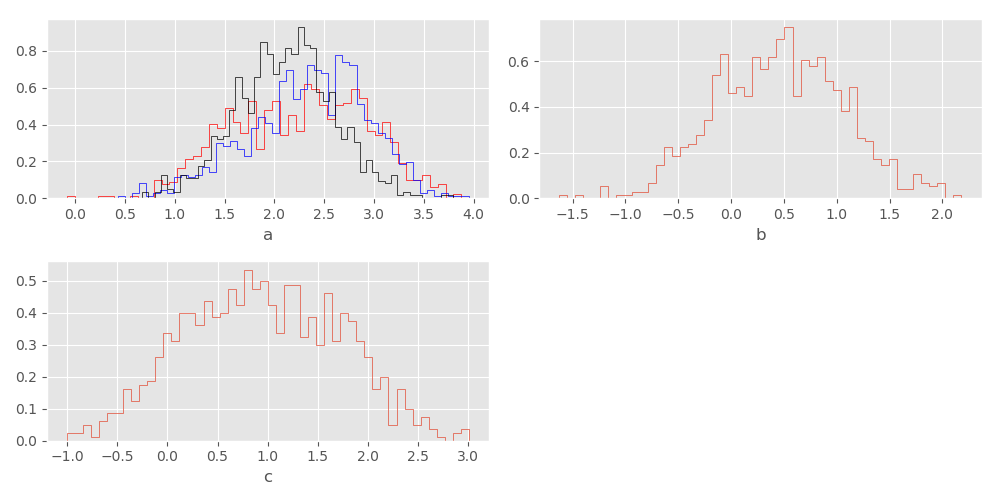

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.hist(Sample_1[0:,0],bins=50,histtype='step',normed=True,color='red')
plt.hist(Sample_2[0:,0],bins=50,histtype='step',normed=True,color='blue')
plt.hist(Sample_3[0:,0],bins=50,histtype='step',normed=True,color='black')
plt.xlabel('a')

plt.subplot(222)
plt.hist(Sample_1[0:,1],bins=50,histtype='step',normed=True)
plt.xlabel('b')


plt.subplot(223)
plt.hist(Sample_1[0:,2],bins=50,histtype='step',normed=True)
plt.xlabel('c')

plt.tight_layout()

<IPython.core.display.Javascript object>


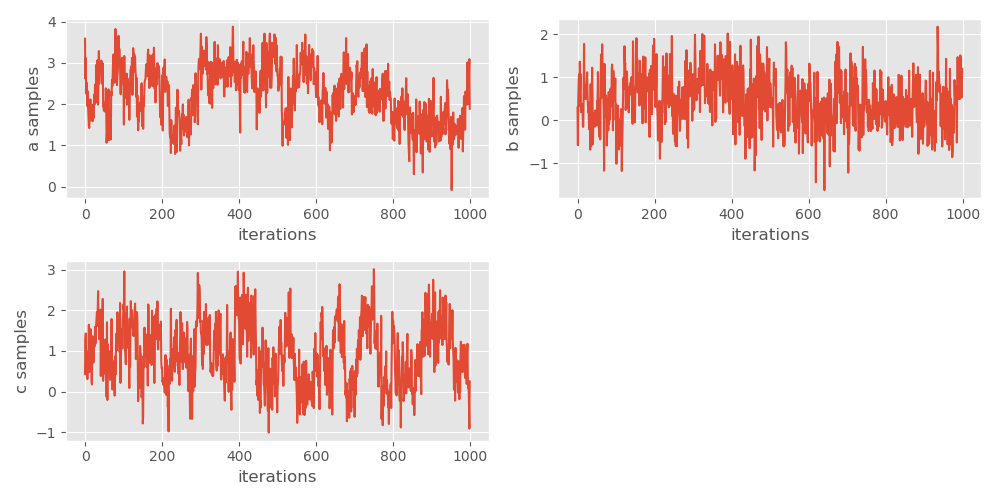

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(Sample_1[0:,0],)
plt.ylabel('a samples')
plt.xlabel('iterations')

plt.subplot(222)
plt.plot(Sample_1[0:,1],)
plt.ylabel('b samples')
plt.xlabel('iterations')

plt.subplot(223)
plt.plot(Sample_1[0:,2],)
plt.ylabel('c samples')
plt.xlabel('iterations')

plt.tight_layout()

In [18]:
a_mean = np.mean(Sample_1[0:,0])
b_mean = np.mean(Sample_1[0:,1])
c_mean = np.mean(Sample_1[0:,2])

In [19]:
a_mean , b_mean , c_mean

(2.2484747572831569, 0.45912523177655029, 0.94694130495868301)

## Changes made
- Bug in the likelihood equation
- Broaden c
- Have different starting values for my paramaters to check convergence

In [24]:
!pip install --upgrade --no-deps corner

  Running setup.py bdist_wheel for corner ... done
  Stored in directory: /home/hope/.cache/pip/wheels/70/d8/e5/e0e7974a2a5757483ea5a180c937041cf6872dc9993d78234a
Successfully built corner
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
import corner

<IPython.core.display.Javascript object>


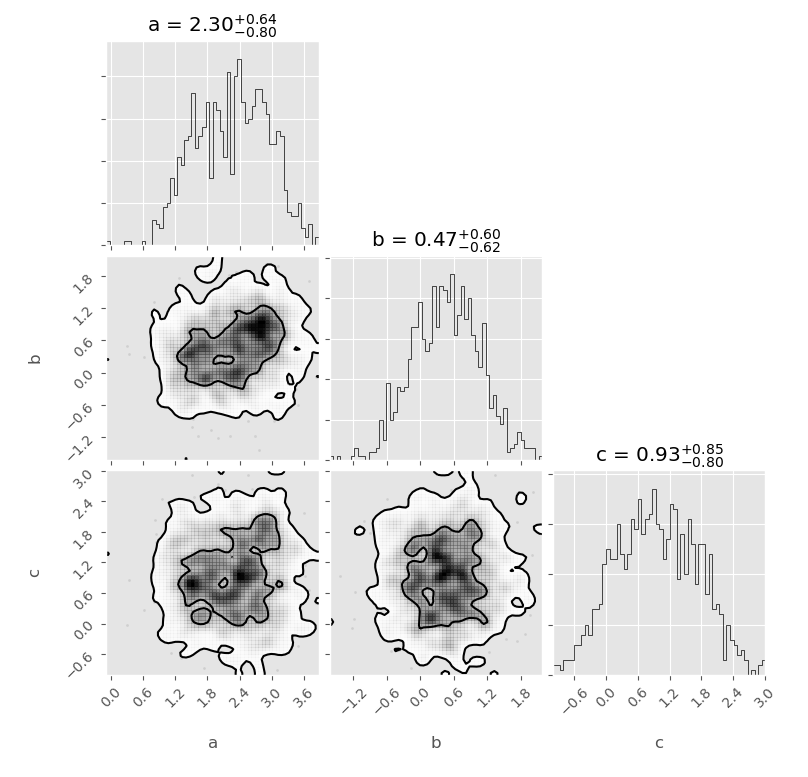

In [62]:
corner.corner(Sample_1,labels=['a','b','c'],show_titles=True,bins=60,levels=[0.5,0.95],smooth=1.5,max_n_ticks=7);

<IPython.core.display.Javascript object>


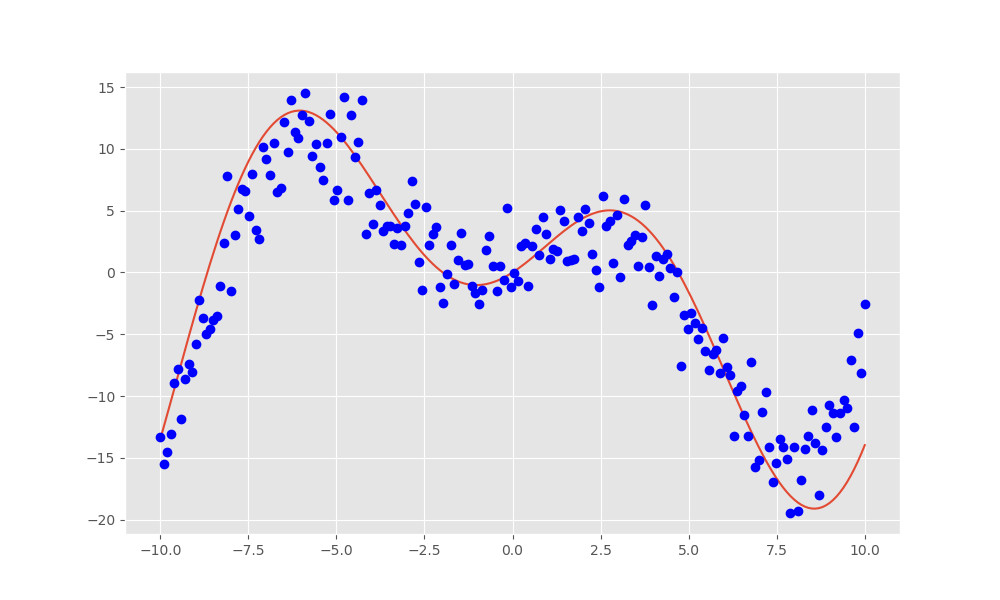

In [55]:
y_model = 2.3*x_values*np.sin(0.47*x_values + 0.93)

plt.figure(figsize=(10,6))
plt.plot(x_values,y_model)
plt.plot(x_values,y_values,'o',color='blue')